In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
from collections import Counter
import string

# DATA

In [13]:
df = pd.read_csv('/Users/f4L/Downloads/transactions.csv')
df = df.dropna(axis=1)
df.head()

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name
0,12/15/2023,DISH NETWORK COR PAYROLL 231212 XXXXX...,DISH NETWORK COR PAYROLL 231212 XXXXX...,1585.28,credit,Paycheck,PERSONAL ACCOUNT
1,12/15/2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,3.52,debit,Snacks & Energy,PERSONAL ACCOUNT
2,12/15/2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,3.52,debit,Snacks & Energy,PERSONAL ACCOUNT
3,12/15/2023,ONLINE TRANSFER TO ALVAREZ F EVERYDAY CHECKING...,ONLINE TRANSFER TO ALVAREZ F EVERYDAY CHECKING...,1400.00,debit,Transfer,PERSONAL ACCOUNT
4,12/15/2023,ONLINE TRANSFER FROM ALVAREZ F EVERYDAY CHECKI...,ONLINE TRANSFER FROM ALVAREZ F EVERYDAY CHECKI...,1400.00,credit,Transfer,Wells Fargo Everyday Checking


# Function to extract words and count frequency

In [4]:
# Function to extract words and count frequency
def count_words(text):
    # Convert text to lowercase and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    # Split the text into words
    words = text.split()
    # Count word frequency
    word_counts = Counter(words)
    return word_counts

# List & Loop: count words in the text of the column

In [5]:
# List to store word counts
word_count_list = []

# Iterate through each row in the column
for index, row in df.iterrows():
    text = row['Original Description']
    # Call the function to count words in the text of the column
    word_counts = count_words(text)
    word_count_list.append(word_counts)

# Combine word counts from all rows
combined_word_counts = sum(word_count_list, Counter())

# Get the most common words (top 10 in this example)
most_common_words = combined_word_counts.most_common(300)

In [33]:
mcw = pd.DataFrame(most_common_words)
mcw.rename(columns={0: 'Word', 1:'Count'}, inplace=True)
mcw.head(10)

,Word,Count
0,paso,2717
1,card,2638
2,on,2502
3,tx,2189
4,el,2176
5,authorized,2085
6,purchase,2073
7,9470,1744
8,9068,742
9,fabian,671


# LIST ROW DATA FOR ACCOUNT TYPE

In [15]:
acctname = df['Account Name'].unique()
acctname

array(['PERSONAL ACCOUNT', 'Wells Fargo Everyday Checking',
       'Fabian Alvarez-Primo - PayPal', 'Visa', 'CREDITCARD Account',
       'Direct Loan - Unsubsidized', 'Direct Loan - Subsidized',
       'CREDIT CARD', 'Wells Fargo Way2Save® Savings',
       'American Express Gold Card'], dtype=object)

# FILTERED DATA BY ACCT

In [16]:
#Filter Data Out into a new df.
df1 = df[df['Account Name'].isin(['PERSONAL ACCOUNT'])]
df1

,Date,Description,Original Description,Amount,Transaction Type,Category,Account Name
0,12/15/2023,DISH NETWORK COR PAYROLL 231212 XXXXX...,DISH NETWORK COR PAYROLL 231212 XXXXX...,1585.28,credit,Paycheck,PERSONAL ACCOUNT
1,12/15/2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,3.52,debit,Snacks & Energy,PERSONAL ACCOUNT
2,12/15/2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,3.52,debit,Snacks & Energy,PERSONAL ACCOUNT
3,12/15/2023,ONLINE TRANSFER TO ALVAREZ F EVERYDAY CHECKING...,ONLINE TRANSFER TO ALVAREZ F EVERYDAY CHECKING...,1400.00,debit,Transfer,PERSONAL ACCOUNT
7,12/14/2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,1.35,debit,Snacks & Energy,PERSONAL ACCOUNT
...,...,...,...,...,...,...,...
6666,12/12/2016,CompanyKids,92COMPANYKITCHEN 8PURCHASE 12/10 MERRIAM KS CA...,5.17,debit,Kids,PERSONAL ACCOUNT
6667,12/12/2016,Oxxo Curva Morfin,OXXO CURVA MORFINPURCHASE INTL 12/10 CD JUAREZ...,12.63,debit,Uncategorized,PERSONAL ACCOUNT
6668,12/12/2016,Foreign Transaction Fee,INTERNATIONAL PURCHASETRANSACTION FEE,0.37,debit,Service Fee,PERSONAL ACCOUNT
6669,12/12/2016,Vinos,VINOS Y LICORES DAPURCHASE INTL 12/11 CD JUARE...,4.49,debit,Alcohol & Bars,PERSONAL ACCOUNT


In [17]:
date = df1['Date']
#Format
date = pd.to_datetime(date)
#Convert to Dataframe, or make sure it is.
date = pd.DataFrame(date)

In [18]:
#Column Splitting
date['Month'] = date['Date'].dt.month
date['Day'] = date['Date'].dt.day
date['Year'] = date['Date'].dt.year

In [19]:
date

,Date,Month,Day,Year
0,2023-12-15,12,15,2023
1,2023-12-15,12,15,2023
2,2023-12-15,12,15,2023
3,2023-12-15,12,15,2023
7,2023-12-14,12,14,2023
...,...,...,...,...
6666,2016-12-12,12,12,2016
6667,2016-12-12,12,12,2016
6668,2016-12-12,12,12,2016
6669,2016-12-12,12,12,2016


In [20]:
# Merge df & new columns
df2 = pd.merge(date,df1, left_index=True, right_index=True)
# Drop columns
df2.drop(columns=['Date_x', 'Date_y'], inplace=True)
# Rename columns
df2.rename(columns={'Month_x': 'Month', 'Day_x':'Day','Year_x': 'Year'}, inplace=True)
# Display the DataFrame with renamed columns
df2.head()

,Month,Day,Year,Description,Original Description,Amount,Transaction Type,Category,Account Name
0,12,15,2023,DISH NETWORK COR PAYROLL 231212 XXXXX...,DISH NETWORK COR PAYROLL 231212 XXXXX...,1585.28,credit,Paycheck,PERSONAL ACCOUNT
1,12,15,2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,3.52,debit,Snacks & Energy,PERSONAL ACCOUNT
2,12,15,2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,3.52,debit,Snacks & Energy,PERSONAL ACCOUNT
3,12,15,2023,ONLINE TRANSFER TO ALVAREZ F EVERYDAY CHECKING...,ONLINE TRANSFER TO ALVAREZ F EVERYDAY CHECKING...,1400.00,debit,Transfer,PERSONAL ACCOUNT
7,12,14,2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,1.35,debit,Snacks & Energy,PERSONAL ACCOUNT


In [21]:
df2.columns.tolist()

['Month',
 'Day',
 'Year',
 'Description',
 'Original Description',
 'Amount',
 'Transaction Type',
 'Category',
 'Account Name']

In [22]:
df2['Category'].unique()

array(['Paycheck', 'Snacks & Energy', 'Transfer',
       'Electronics & Software', 'Credit Card Payment', 'Auto Payment',
       'Shopping', 'Home Improvement', 'Groceries', 'Gas & Fuel',
       'Lunch Spend', 'Gym', 'Federal Tax', 'Clothing', 'Restaurants',
       'Home', 'Pets', 'Laundry', 'Service Fee', 'Music', 'Entertainment',
       'Fast Food', 'Television', 'Internet', 'Tuition', 'Pharmacy',
       'Coffee Shops', 'Dentist', 'Food Delivery', 'ATM Fee',
       'Cash & ATM', 'Income', 'Service & Parts', 'Utilities',
       'Business Services', 'Sporting Goods', 'Public Transportation',
       'Alcohol & Bars', 'Sports', 'Hair', 'Home Services',
       'Movies & DVDs', 'Parking', 'Amusement', 'Bank Fee',
       'Food & Dining', 'Gifts & Donations', 'Doctor', 'Auto & Transport',
       'Fees & Charges', 'Shipping', 'Office Supplies', 'Mobile Phone',
       'Uncategorized', 'Education', 'Advertising', 'Books', 'Vacation',
       'Ride Share', 'Charity', 'Hotel', 'Mortgage & Rent',
 

In [ ]:
df2d = df2[df2['Transaction Type'].isin(['debit'])]
df2c = df2[df2['Transaction Type'].isin(['credit'])]

In [27]:
df2d.head()

,Month,Day,Year,Description,Original Description,Amount,Transaction Type,Category,Account Name
1,12,15,2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,3.52,debit,Snacks & Energy,PERSONAL ACCOUNT
2,12,15,2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,3.52,debit,Snacks & Energy,PERSONAL ACCOUNT
3,12,15,2023,ONLINE TRANSFER TO ALVAREZ F EVERYDAY CHECKING...,ONLINE TRANSFER TO ALVAREZ F EVERYDAY CHECKING...,1400.00,debit,Transfer,PERSONAL ACCOUNT
7,12,14,2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,1.35,debit,Snacks & Energy,PERSONAL ACCOUNT
8,12,14,2023,RECURRING PAYMENT AUTHOR...,RECURRING PAYMENT AUTHOR...,31.98,debit,Electronics & Software,PERSONAL ACCOUNT


In [26]:
df2c.head()

,Month,Day,Year,Description,Original Description,Amount,Transaction Type,Category,Account Name
0,12,15,2023,DISH NETWORK COR PAYROLL 231212 XXXXX...,DISH NETWORK COR PAYROLL 231212 XXXXX...,1585.28,credit,Paycheck,PERSONAL ACCOUNT
45,12,4,2023,APPLE CASH BANK XFER Fabian Alv...,APPLE CASH BANK XFER Fabian Alv...,20.00,credit,Transfer,PERSONAL ACCOUNT
58,12,1,2023,DISH NETWORK COR PAYROLL 231128 XXXXX...,DISH NETWORK COR PAYROLL 231128 XXXXX...,1821.79,credit,Paycheck,PERSONAL ACCOUNT
114,11,20,2023,ZELLE FROM PEREZ GUADALUPE ON 11/19 REF # PP0R...,ZELLE FROM PEREZ GUADALUPE ON 11/19 REF # PP0R...,222.00,credit,Transfer,PERSONAL ACCOUNT
115,11,20,2023,ZELLE FROM PEREZ GUADALUPE ON 11/19 REF # PP0R...,ZELLE FROM PEREZ GUADALUPE ON 11/19 REF # PP0R...,1.00,credit,Transfer,PERSONAL ACCOUNT


In [ ]:
#df2 = df2[df2['Month'].isin([12])]

#DEBITS
df20d = df2d[df2d['Year'].isin([2020])]
df21d = df2d[df2d['Year'].isin([2021])]
df22d = df2d[df2d['Year'].isin([2022])]
df23d = df2d[df2d['Year'].isin([2023])]

#CREDITS
df20c = df2c[df2c['Year'].isin([2020])]
df21c = df2c[df2c['Year'].isin([2021])]
df22c = df2c[df2c['Year'].isin([2022])]
df23c = df2c[df2c['Year'].isin([2023])]

In [49]:
df23d

,Month,Day,Year,Description,Original Description,Amount,Transaction Type,Category,Account Name
1,12,15,2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,3.52,debit,Snacks & Energy,PERSONAL ACCOUNT
2,12,15,2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,3.52,debit,Snacks & Energy,PERSONAL ACCOUNT
3,12,15,2023,ONLINE TRANSFER TO ALVAREZ F EVERYDAY CHECKING...,ONLINE TRANSFER TO ALVAREZ F EVERYDAY CHECKING...,1400.00,debit,Transfer,PERSONAL ACCOUNT
7,12,14,2023,PURCHASE AUTHOR...,PURCHASE AUTHOR...,1.35,debit,Snacks & Energy,PERSONAL ACCOUNT
8,12,14,2023,RECURRING PAYMENT AUTHOR...,RECURRING PAYMENT AUTHOR...,31.98,debit,Electronics & Software,PERSONAL ACCOUNT
...,...,...,...,...,...,...,...,...,...
1460,1,9,2023,WF Credit Card AUTO PAY 230108 90143066321...,WF Credit Card AUTO PAY 230108 90143066321...,143.00,debit,Credit Card Payment,PERSONAL ACCOUNT
1462,1,5,2023,RECURRING PAYMENT AUTHOR...,RECURRING PAYMENT AUTHOR...,3.78,debit,Electronics & Software,PERSONAL ACCOUNT
1463,1,4,2023,RECURRING PAYMENT AUTHOR...,RECURRING PAYMENT AUTHOR...,10.83,debit,Gym,PERSONAL ACCOUNT
1466,1,3,2023,RECURRING PAYMENT AUTHOR...,RECURRING PAYMENT AUTHOR...,16.18,debit,Books,PERSONAL ACCOUNT


In [43]:
Category = df23d['Category']
Amount = df23d['Amount']

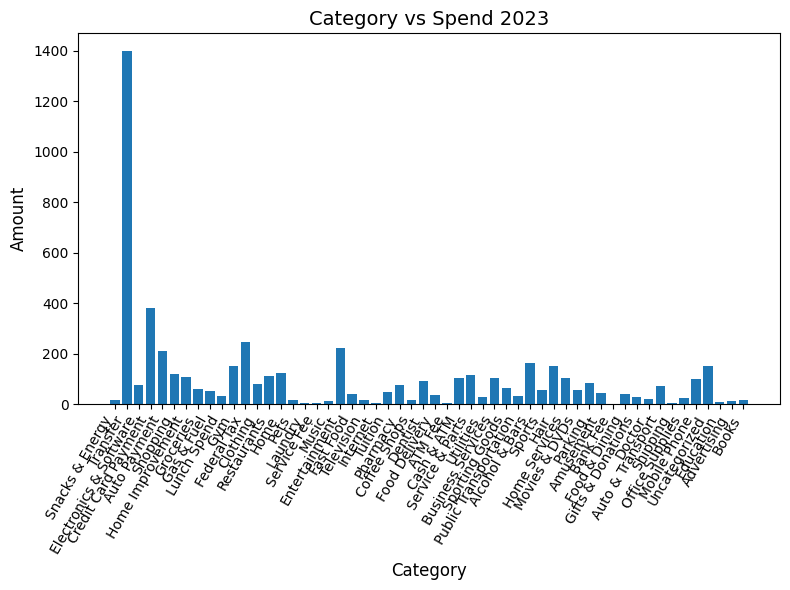

In [48]:
# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(Category, Amount)
plt.xticks(rotation=60, ha='right')  # Increase rotation angle and adjust alignment
plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Category vs Spend 2023', fontsize=14)
plt.tight_layout()
plt.show()

In [54]:
import pandas as pd

# Get unique categories
unique_categories = df23d['Category'].unique()

# Calculate sum of 'Amount' for each unique category
sums_by_category = {}
for category in unique_categories:
    sums_by_category[category] = df23d.loc[df23d['Category'] == category, 'Amount'].sum()

# Display the sums for each unique category
for key, value in sums_by_category.items():
    print(f"{key}: {value}")


Snacks & Energy: 93.16
Transfer: 19918.949999999997
Electronics & Software: 453.09
Credit Card Payment: 5973.3099999999995
Auto Payment: 2549.28
Shopping: 2271.07
Home Improvement: 482.74000000000007
Groceries: 828.23
Gas & Fuel: 1810.21
Lunch Spend: 53.660000000000004
Gym: 621.92
Federal Tax: 1019.03
Clothing: 303.14000000000004
Restaurants: 2501.9300000000003
Home: 689.3799999999999
Pets: 16.4
Laundry: 19.0
Service Fee: 21.25
Music: 122.27000000000001
Entertainment: 449.2099999999999
Fast Food: 1273.49
Television: 76.78
Internet: 26.550000000000004
Tuition: 147.0
Pharmacy: 362.69
Coffee Shops: 108.61000000000001
Dentist: 134.17000000000002
Food Delivery: 123.08
ATM Fee: 56.0
Cash & ATM: 1115.75
Service & Parts: 470.7800000000001
Utilities: 26.97
Business Services: 608.84
Sporting Goods: 113.65
Public Transportation: 50.03
Alcohol & Bars: 354.27
Sports: 181.17999999999998
Hair: 1200.8500000000001
Home Services: 106.24
Movies & DVDs: 275.14
Parking: 96.25
Amusement: 42.78
Bank Fee: 2.0

label = ['Snacks & Energy', 
'Home Improvement',
'Electronics & Software',
'Credit Card Payment',
'Gas & Fuel',
'Lunch Spend',
'Transfer',
'Groceries',
'Gym',
'Auto Payment',
'Shopping',
'Federal Tax']
label = pd.DataFrame(label)
label